In [1]:
import scvelo as scv
import seaborn as sns
import numpy as np

In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.settings.set_figure_params('scvelo')  # for beautified visualization

## Read data

In [3]:
adata = scv.datasets.pancreas()
adata

100%|██████████| 50.0M/50.0M [00:08<00:00, 6.40MB/s]


AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [4]:
scv.utils.show_proportions(adata)
adata

Abundance of ['spliced', 'unspliced']: [0.83 0.17]


AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

## Gene selection by detection, high variability, normalizing every cell by its initial size and logarithmizing X

In [5]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=5000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 5000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:08) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


## Calculating RNA velocity

In [6]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [7]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:11) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


## Plot

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_umap_stream.svg


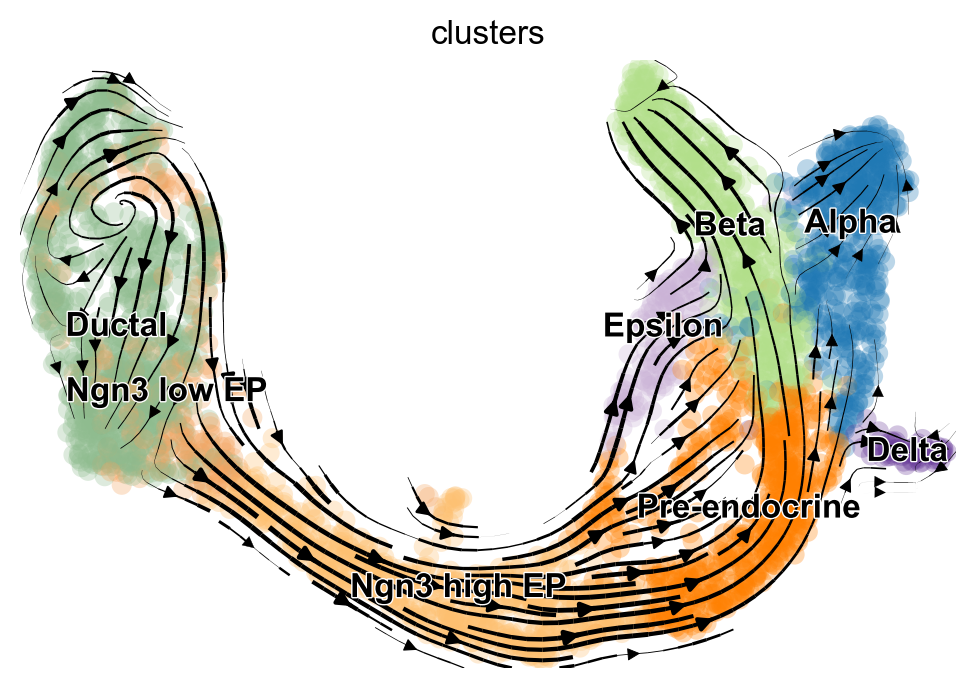

In [8]:
scv.pl.velocity_embedding_stream(adata, basis="umap", save="umap_stream.svg")

saving figure to file ./figures/scvelo_umap_vector.svg


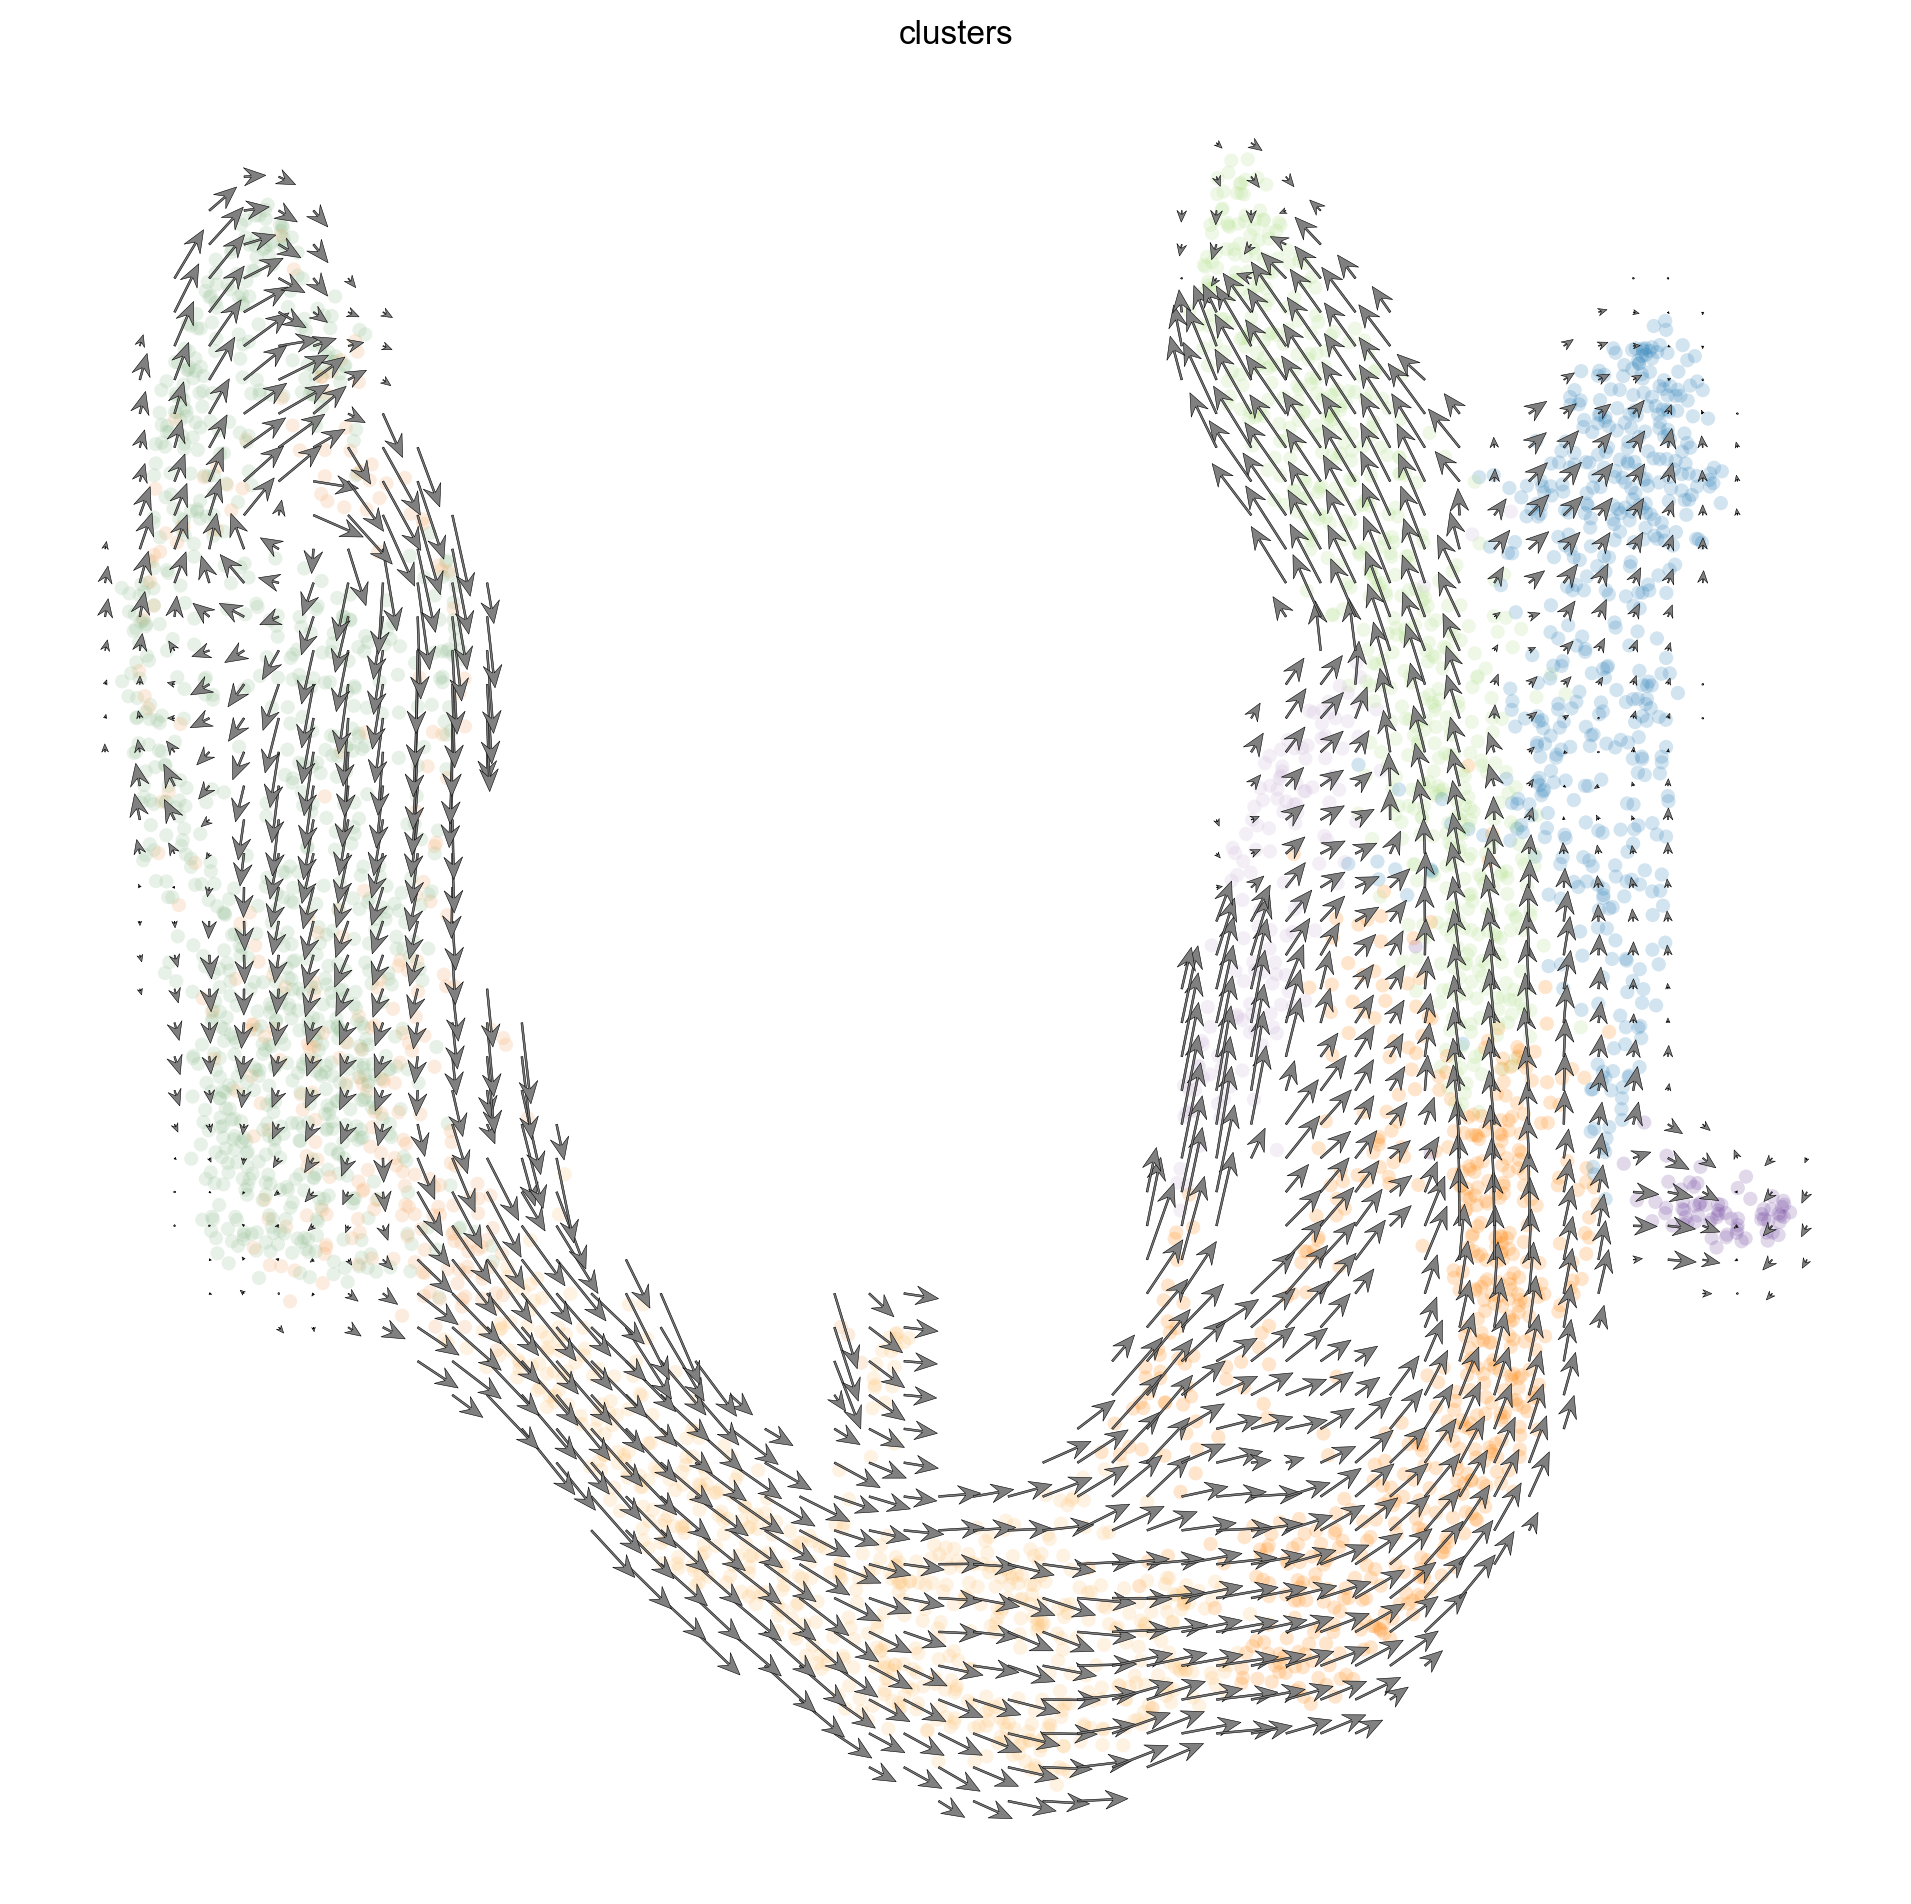

In [9]:
scv.pl.velocity_embedding_grid(adata, basis="umap", figsize=(12, 12), arrow_size=2, arrow_length=5, save="umap_vector.svg")

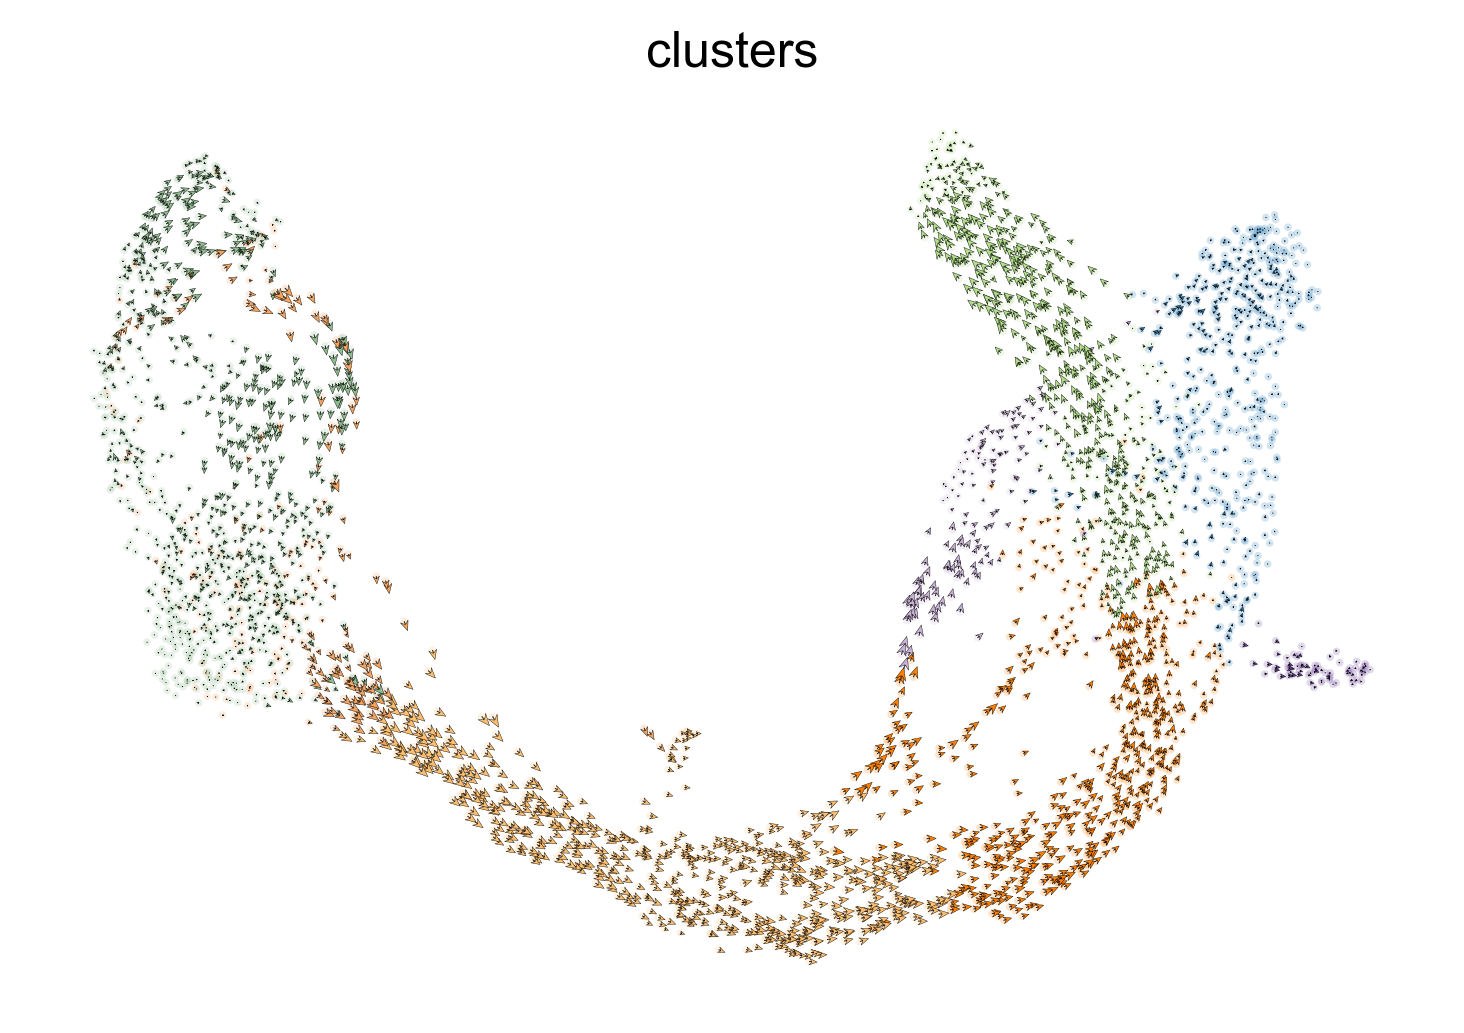

In [10]:
scv.pl.velocity_embedding(adata, basis='umap', arrow_length=2, arrow_size=1.5, dpi=150)

## Latent time

In [11]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/12 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:06:40) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [12]:
scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:09) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [13]:
adata.layers["velocity"]

array([[0.        ,        nan,        nan, ...,        nan, 0.07519344,
               nan],
       [0.00041078,        nan,        nan, ...,        nan, 0.06968156,
               nan],
       [0.00043541,        nan,        nan, ...,        nan, 0.07554864,
               nan],
       ...,
       [0.00032146,        nan,        nan, ...,        nan, 0.05455139,
               nan],
       [0.00074778,        nan,        nan, ...,        nan, 0.08885985,
               nan],
       [0.00027491,        nan,        nan, ...,        nan, 0.0866844 ,
               nan]])

## Plot latent time

In [14]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:16) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [15]:
adata.layers["velocity"]

array([[ 0.04580861, -0.01680831, -0.01387355, ...,  0.0807274 ,
         0.10245642, -0.18395028],
       [ 0.0586004 , -0.00682439, -0.10649812, ...,  0.05441269,
         0.04791882,  0.11497691],
       [ 0.0586963 , -0.02106722,  0.00361346, ...,  0.10203939,
         0.0268011 , -0.12865394],
       ...,
       [ 0.02947635, -0.04725819, -0.11030324, ..., -0.00070206,
         0.03640526,  0.07908875],
       [ 0.16557544, -0.07689549, -0.03181028, ..., -0.16426595,
         0.10209341, -0.2842675 ],
       [ 0.06503278, -0.04560947, -0.05007329, ...,  0.11356676,
        -0.02238486, -0.17942652]], dtype=float32)

computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo_latent_time.svg


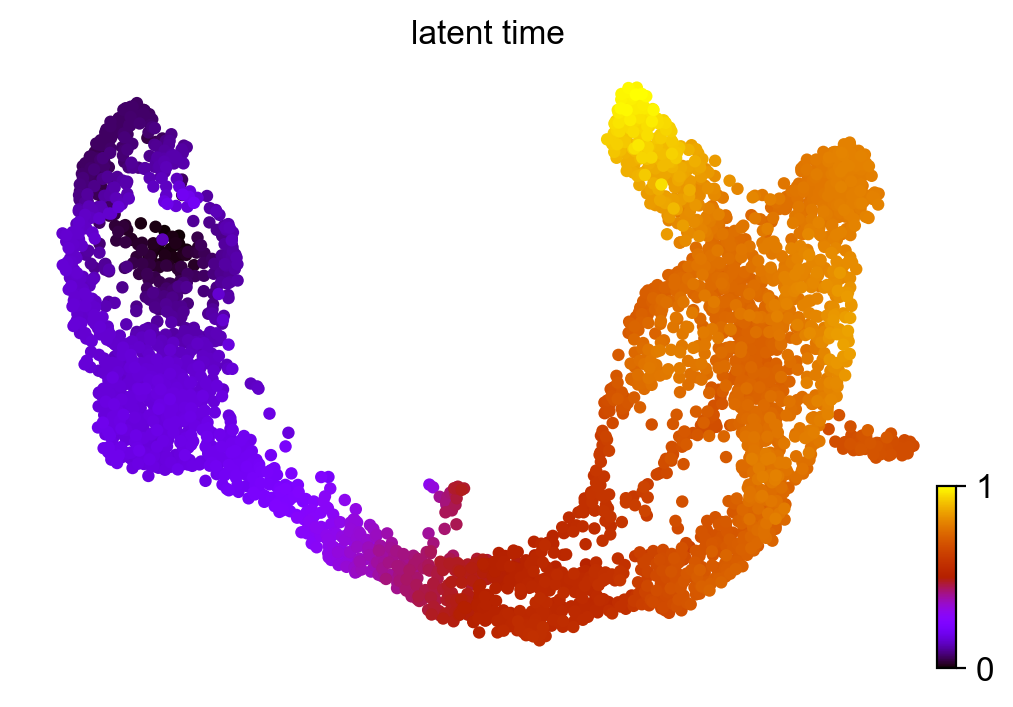

In [16]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80, colorbar=True, save="latent_time.svg")

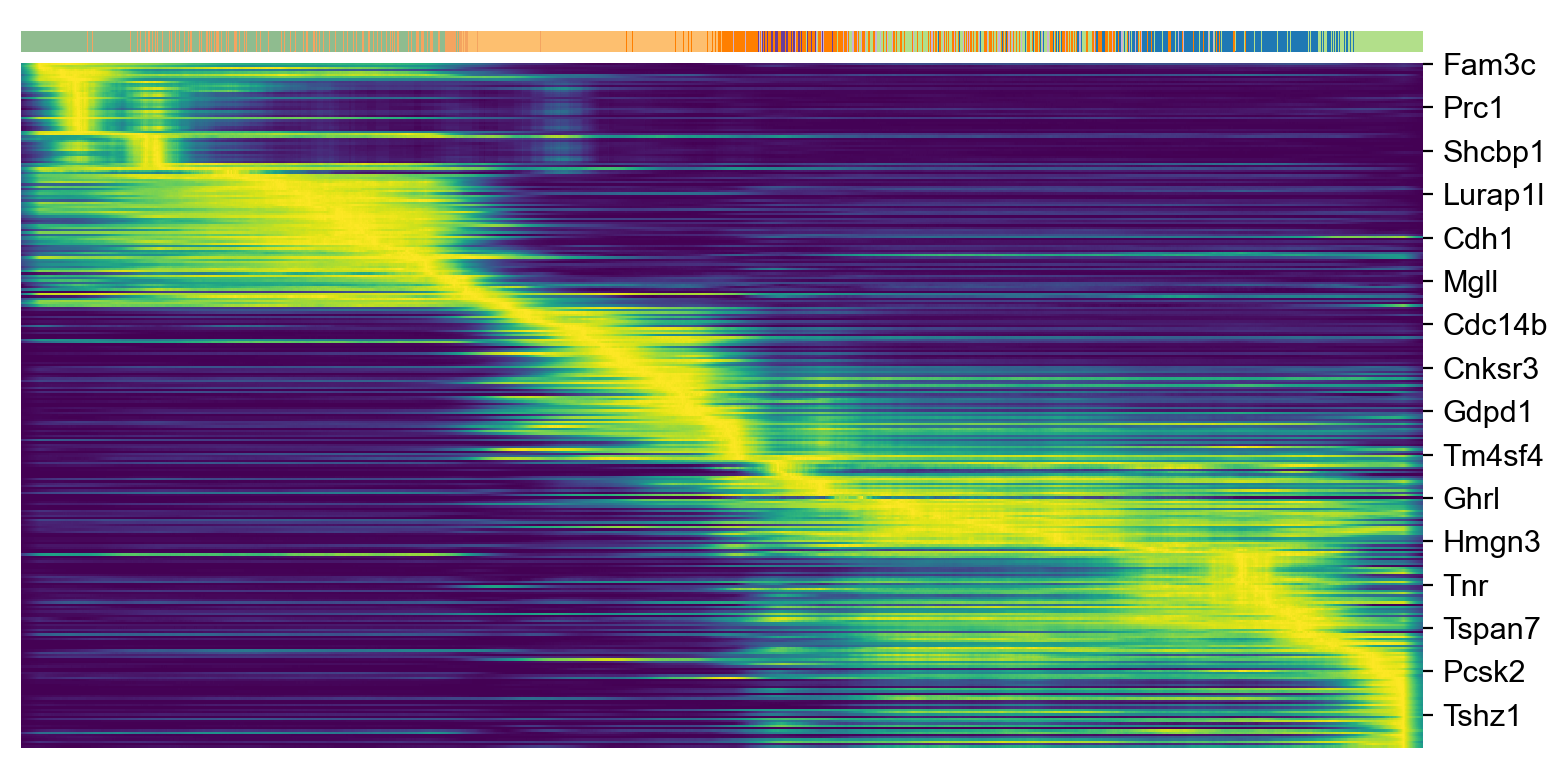

In [17]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, tkey='latent_time', n_convolve=100, col_color='clusters')

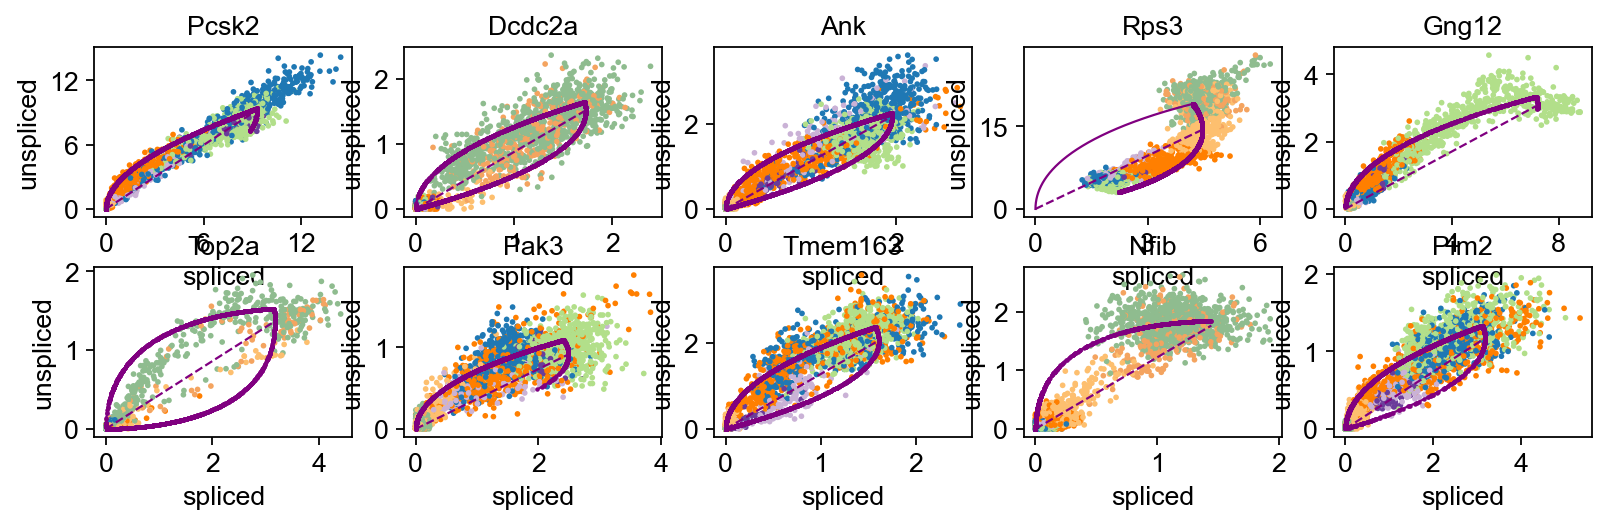

In [18]:
scv.pl.scatter(adata, basis=top_genes[:10], ncols=5)

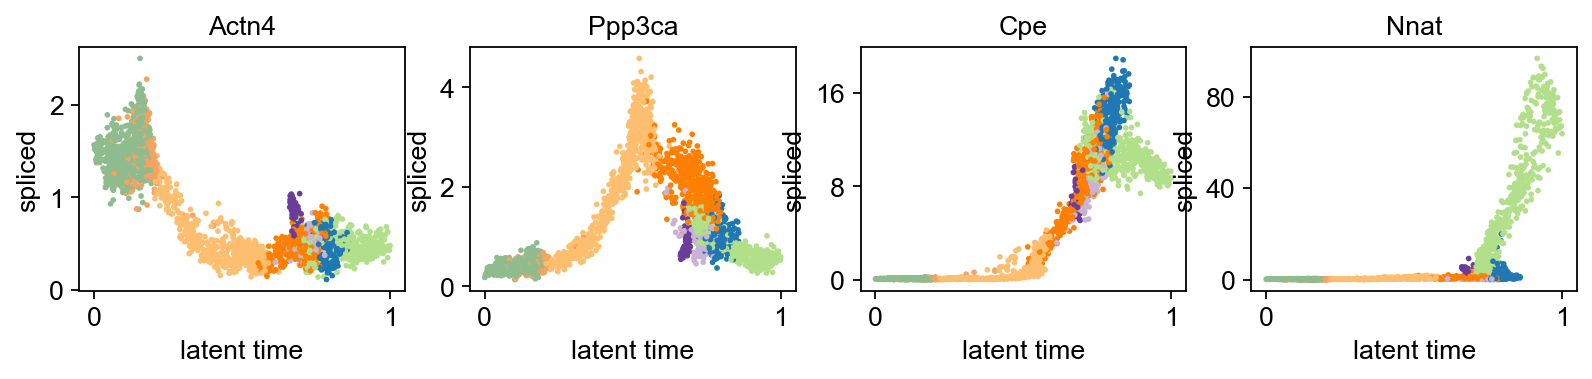

In [19]:
scv.pl.scatter(adata, x='latent_time', y=['Actn4', 'Ppp3ca', 'Cpe', 'Nnat'])

## Fetch data

In [20]:
adata

AnnData object with n_obs × n_vars = 3696 × 5000
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'fit_r2'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'recover_dynamics'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'loss'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_

In [21]:
adata.X

<3696x5000 sparse matrix of type '<class 'numpy.float32'>'
	with 4668810 stored elements in Compressed Sparse Row format>

In [22]:
adata.obs[["clusters", "clusters_coarse", "root_cells", "end_points", "latent_time"]].to_csv("../results/obs.tsv", sep="\t")

In [23]:
adata.var[["fit_alpha", "fit_beta", "fit_gamma", "fit_t_", "fit_likelihood", "fit_u0", "fit_s0"]].to_csv("../results/genes.tsv", sep="\t")

In [24]:
adata.varm['loss']

array([[ 158.03638341,  158.40533238,  158.40533238, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [2082.14733557, 2122.27687071, 2162.59333012, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]])

In [25]:
adata.varm['loss'].shape

(5000, 22)

In [26]:
adata.layers["velocity"]

array([[ 0.04580861, -0.01680831, -0.01387355, ...,  0.0807274 ,
         0.10245642, -0.18395028],
       [ 0.0586004 , -0.00682439, -0.10649812, ...,  0.05441269,
         0.04791882,  0.11497691],
       [ 0.0586963 , -0.02106722,  0.00361346, ...,  0.10203939,
         0.0268011 , -0.12865394],
       ...,
       [ 0.02947635, -0.04725819, -0.11030324, ..., -0.00070206,
         0.03640526,  0.07908875],
       [ 0.16557544, -0.07689549, -0.03181028, ..., -0.16426595,
         0.10209341, -0.2842675 ],
       [ 0.06503278, -0.04560947, -0.05007329, ...,  0.11356676,
        -0.02238486, -0.17942652]], dtype=float32)

In [27]:
adata.layers["variance_velocity"]

array([[ 0.04580861,  0.        ,  0.        , ...,  0.        ,
         0.10591948,  0.        ],
       [ 0.0586004 ,  0.        ,  0.        , ...,  0.        ,
         0.07975884,  0.        ],
       [ 0.0586963 ,  0.        ,  0.        , ...,  0.        ,
         0.08794332,  0.        ],
       ...,
       [ 0.02947635,  0.        ,  0.        , ...,  0.        ,
         0.01984216,  0.        ],
       [ 0.16557544,  0.        ,  0.        , ...,  0.        ,
         0.13037014,  0.        ],
       [ 0.06503278,  0.        ,  0.        , ...,  0.        ,
        -0.09518972,  0.        ]], dtype=float32)

In [28]:
adata.layers["Ms"]

array([[0.        , 0.09170523, 0.31039876, ..., 0.34444076, 0.4041485 ,
        0.2980739 ],
       [0.        , 0.09930076, 0.94136125, ..., 0.29129952, 0.3593959 ,
        0.2749898 ],
       [0.        , 0.04544721, 0.1618666 , ..., 0.11131731, 0.07235485,
        0.32612336],
       ...,
       [0.        , 0.10194762, 0.720105  , ..., 0.04863719, 0.06350702,
        0.40607318],
       [0.        , 0.1658826 , 0.20767063, ..., 0.42745283, 0.27667657,
        0.51486397],
       [0.        , 0.13869187, 0.32689905, ..., 0.11466524, 0.19451821,
        0.35956037]], dtype=float32)

In [29]:
import pandas as pd

In [30]:
pd.DataFrame(adata.layers["velocity"], columns=adata.var.index, index=adata.obs.index).to_csv("../results/velocity.tsv", sep="\t")

In [31]:
pd.DataFrame(adata.layers["variance_velocity"], columns=adata.var.index, index=adata.obs.index).to_csv("../results/variance_velocity.tsv", sep="\t")

In [32]:
pd.DataFrame(adata.layers["unspliced"].toarray(), columns=adata.var.index, index=adata.obs.index).to_csv("../results/unspliced.tsv", sep="\t")

In [33]:
adata.layers["unspliced"]

<3696x5000 sparse matrix of type '<class 'numpy.float32'>'
	with 2086708 stored elements in Compressed Sparse Row format>

In [34]:
pd.DataFrame(adata.layers["spliced"].toarray(), columns=adata.var.index, index=adata.obs.index).to_csv("../results/spliced.tsv", sep="\t")

In [35]:
pd.DataFrame(adata.X.toarray(), columns=adata.var.index, index=adata.obs.index).to_csv("../results/gene_expr.tsv", sep="\t")

In [36]:
pd.DataFrame(adata.layers["velocity_u"], columns=adata.var.index, index=adata.obs.index).to_csv("../results/velocity_u.tsv", sep="\t")

In [37]:
pd.DataFrame(adata.layers["Mu"], columns=adata.var.index, index=adata.obs.index).to_csv("../results/Mu.tsv", sep="\t")

In [38]:
pd.DataFrame(adata.layers["Ms"], columns=adata.var.index, index=adata.obs.index).to_csv("../results/Ms.tsv", sep="\t")